## Análise de Desempenho de Leads

### Este projeto busca identificar os principais motivos de desqualificação de leads, analisar o desempenho de diferentes segmentos de indústria e equipes de vendas, e destacar os melhores clientes da empresa. Com base em dados de conversão e lealdade, o estudo oferece informações para otimizar estratégias de vendas e retenção de clientes

**CENÁRIO**

**Empresa:** Heyio (empresa fictícia) é uma startup de SaaS B2B especializada em Marketing Conversacional, fornecendo serviços e recursos de chatbot para seus clientes na América do Norte e Europa.

**Indústria:** Tecnologia > Software como Serviço (SaaS).

**Situação:** Os times de Marketing e Vendas estão sendo pressionados para melhorar seus resultados. Após uma negativa do conselho sobre o aumento de investimento nas áreas, eles precisam criar um plano de ação para melhorar a eficiência de vendas com os mesmos recursos.

Você é um analista de dados na Heyio e os gerentes pediram a sua ajuda para responder algumas perguntas importantes de negócio para tomarem as melhores decisões em suas áreas. 

Juddy é a gerente de Marketing
Mark é o gerente de Vendas

Juddy precisa saber quais as  fontes de leads que resultam a melhor conversão em cliente para que ela possa direcionar melhor os investimentos de Marketing.

Mark quer saber quais são os principais motivos de desqualificação dos leads para criar um plano de ação.

**O DESAFIO**<br>
O seu desafio como analista de dados é ajudar a Juddy e o Mark a responder as perguntas de negócio e trazer análises adicionais que possam trazer insights valiosos para eles.

Você tem as seguintes tarefas:

a) Baixar a base de dados de leads neste [link](https://docs.google.com/spreadsheets/d/1QVEwyG4_XjCN3v7tOlUpDiDAN9mzeF3b/edit?usp=drive_link&ouid=106472479590074415438&rtpof=true&sd=true)<br>
b) Sincronizar a base de dados no Looker Studio para exploração<br>
c) Criar gráficos e/ou tabelas que sejam capazes de responder às seguintes perguntas:

    i) Quais as fontes de leads que mais convertem em clientes?<br>
    ii) Quais os principais motivos de desqualificação de leads?<br>
    iii) Quais os melhores segmentos de indústria com maior potencial de se tornarem clientes?<br>

d) Criar outras análises que em sua visão possam ser úteis para a Juddy e Mark<br>
e) Criar um breve resumo da sua análise e considerações 


## a) Baixando a base de Dados

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Carregando os dados 
file_path = 'case-study.csv'
data = pd.read_csv(file_path)

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Columns: 196 entries, Record ID to TestIDs
dtypes: float64(48), int64(3), object(145)
memory usage: 2.8+ MB
None


In [4]:
data.head()

,Record ID,Activity Count Trigger,Activity trigger,Adoption date,Adoption rate,Brazil state list,Churn date,Churn rate,Company address,Company name,...,Associated Meeting IDs,Associated Note IDs,Associated Call IDs,Associated Customer IDs,Associated Email IDs,Associated Deal IDs,Associated Ticket IDs,Associated Health Score IDs,Associated Company IDs,TestIDs
0,12596125813,NaN,NaN,NaN,No,NaN,NaN,No,NaN,Teste Forms,...,NaN,NaN,50106357362,NaN,NaN,NaN,NaN,NaN,1.969536e+10,NaN
1,12448297328,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN,...,49090978647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.950588e+10,NaN
2,12435722818,NaN,NaN,NaN,No,NaN,NaN,No,NaN,Oobj,...,49029157260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.949164e+10,NaN
3,12416851106,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NOVO 30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.947036e+10,NaN
4,12356060770,NaN,NaN,NaN,No,NaN,NaN,No,NaN,Growth Machine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.939798e+10,NaN


In [5]:
# Visualizando colunas vazias
print('Total de colunas vazias:',  len(data.columns[data.isnull().all()]))

Total de colunas vazias: 33


## c) Criar gráficos e/ou tabelas que sejam capazes de responder às seguintes perguntas:


## i) Quais as fontes de leads que mais convertem em clientes?

In [6]:
# Avaliando a última fonte dos leads
data['Latest source'].value_counts()

Paid Search        557
Referrals          411
Direct Traffic     207
Paid Social        200
Organic Social     179
Email Marketing    119
Other Campaigns    104
Organic Search     100
Offline Sources     15
Name: Latest source, dtype: int64

In [7]:
# Calculando o número total de leads por fonte
total_leads_by_source = data['Latest source'].value_counts()

# Calculando o número de conversões em  clientes por fonte
converted_leads_by_source = data[data['Customer rate'] == 'Yes']['Latest source'].value_counts()

# Calculando a porcentagem de conversão em clientes por fonte
conversion_rate_by_source = (converted_leads_by_source / total_leads_by_source) * 100
conversion_rate_by_source = conversion_rate_by_source.sort_values(ascending=False)

# Criando um DataFrame com os resultados
conversion_analysis = pd.DataFrame({
    'Total Leads': total_leads_by_source,
    'Converted Leads': converted_leads_by_source,
    'Conversion Rate (%)': conversion_rate_by_source
}).fillna(0).sort_values(by='Conversion Rate (%)', ascending=False)

# Exibir os resultados
conversion_analysis

,Total Leads,Converted Leads,Conversion Rate (%)
Email Marketing,119,112,94.117647
Organic Search,100,93,93.000000
Paid Social,200,186,93.000000
Referrals,411,367,89.294404
Paid Search,557,495,88.868941
Organic Social,179,159,88.826816
Other Campaigns,104,89,85.576923
Direct Traffic,207,151,72.946860
Offline Sources,15,3,20.000000


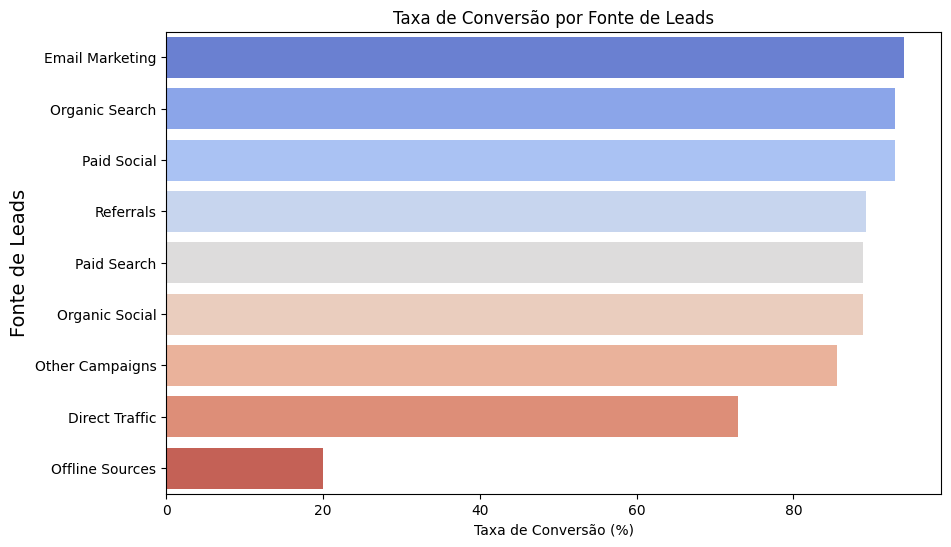

In [8]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(y=conversion_rate_by_source.index, x=conversion_rate_by_source.values, palette='coolwarm')
plt.xlabel('Taxa de Conversão (%)')
plt.ylabel('Fonte de Leads', fontsize=14)
plt.title('Taxa de Conversão por Fonte de Leads')
plt.show()

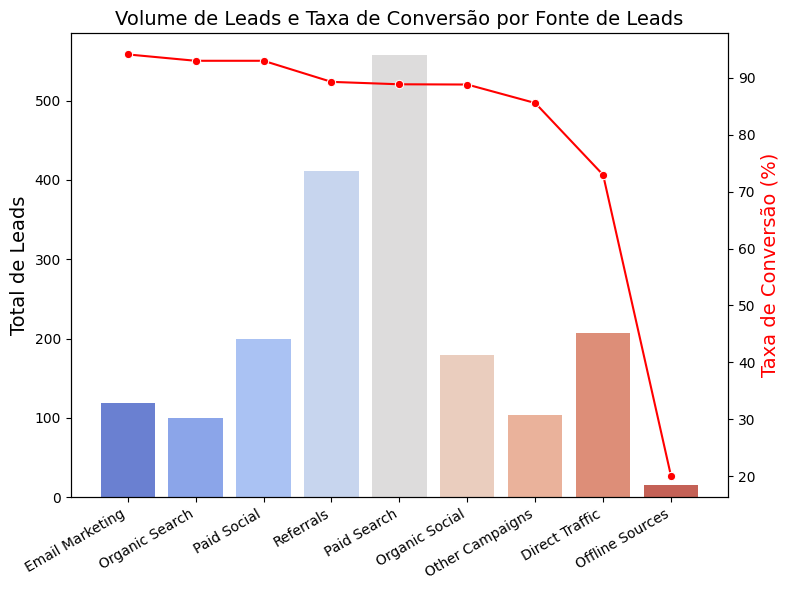

In [9]:
# Configurando o tamanho da figura
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotando o gráfico de barras para o volume de leads
sns.barplot(x=conversion_analysis.index,
    y='Total Leads',
    data=conversion_analysis,
    palette='coolwarm',
    ax=ax1)

# Adicionando títulos e rótulos com fonte maior
ax1.set_ylabel('Total de Leads', fontsize=14)
ax1.set_title('Volume de Leads e Taxa de Conversão por Fonte de Leads', fontsize=14)

# Criando um segundo eixo y para a taxa de conversão
ax2 = ax1.twinx()

# Plotando o gráfico de linhas para a taxa de conversão
sns.lineplot(x=conversion_analysis.index,
    y='Conversion Rate (%)',
    data=conversion_analysis,
    sort=False,
    color='r',
    marker='o',
    ax=ax2)

# Adicionando rótulo para o segundo eixo y
ax2.set_ylabel('Taxa de Conversão (%)', color='r', fontsize=14)

# Rotacionando os rótulos do eixo x
ax1.set_xticklabels(conversion_analysis.index, rotation=30, ha='right', fontsize=10)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()


## Resposta:

### Fontes de Leads que mais Convertem em Clientes
1. **Email Marketing:**
Apesar de ter um número moderado de leads (119), sua taxa de conversão é a mais alta (94.12%). Isso sugere que esta é uma fonte muito eficaz para conversão de leads em clientes.

2. **Organic Search e Paid Social:**
Ambas têm altas taxas de conversão (93.00%) e um volume significativo de leads (100 e 200 respectivamente). São fontes altamente valiosas.

3. **Referrals e Paid Search:**
Com altos volumes de leads (411 e 557 respectivamente) e boas taxas de conversão (89.29% e 88.87%), essas fontes são muito importantes para seu negócio.

4. **Direct Traffic:**
Embora tenha um número razoável de leads (207), sua taxa de conversão é menor (72.95%).

5. **Offline Sources:**
Esta fonte tem o menor número de leads (15) e a menor taxa de conversão (20.00%). Esta pode ser uma fonte a ser despriorizada.

**Considerando a taxa de conversão e o volume de leads, fontes como Paid Search, Referrals, Email Marketing, Organic Search, e Paid Social são altamente recomendadas para foco e potencial expansão.**

## ii) Quais os principais motivos de desqualificação de leads?

In [10]:
# Avaliando a desqualificação
print(data['Unqualified rate'].describe())

count     1894
unique       2
top         No
freq      1437
Name: Unqualified rate, dtype: object


In [11]:
# Calculando a frequência de cada motivo de desqualificação
unqualified_reasons_count = data['Unqualified reason'].value_counts()

# Calculando a porcentagem para cada motivo
total_count = unqualified_reasons_count.sum()
unqualified_reasons_percentage = (unqualified_reasons_count / total_count) * 100

# Criando um DataFrame com os resultados
unqualified_reasons_analysis = pd.DataFrame({
    'Reason': unqualified_reasons_count.index,
    'Count': unqualified_reasons_count.values,
    'Percentage': unqualified_reasons_percentage.values
}).sort_values(by='Count', ascending=False)

# Exibindo os resultados
unqualified_reasons_analysis

,Reason,Count,Percentage
0,Not the target market,100,21.834061
1,Product doesn't fit needs,100,21.834061
2,Just researching,100,21.834061
3,Response time expired,60,13.100437
4,Became unresponsive,60,13.100437
5,Auto - Deal rejected,35,7.641921
6,Unable to connect,2,0.436681
7,Auto - 3rd No Show,1,0.218341


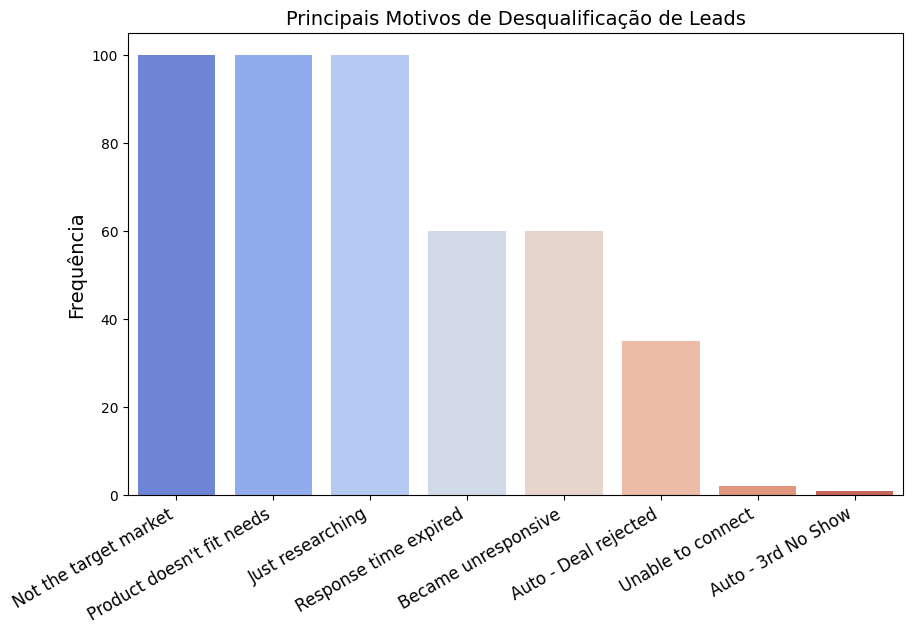

In [12]:
# Visualizar os principais motivos de desqualificação
plt.figure(figsize=(10, 6))
sns.barplot(x=unqualified_reasons_count.index, y=unqualified_reasons_count.values, palette='coolwarm')
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.ylabel('Frequência', fontsize=14)
plt.title('Principais Motivos de Desqualificação de Leads', fontsize=14)
plt.show()

## Resposta
### Análise dos Motivos de Desqualificação de Leads

### Principais Motivos de Desqualificação

1. **Not the target market** (21.83%): A maior parte dos leads desqualificados não faz parte do mercado-alvo.
2. **Product doesn't fit needs** (21.83%): Muitos leads consideram que o produto não atende às suas necessidades.
3. **Just researching** (21.83%): Uma quantidade significativa de leads estava apenas pesquisando e não tinha intenção imediata de comprar.

### Outros Motivos Relevantes

- **Response time expired** (13.10%): Alguns leads foram desqualificados devido ao tempo de resposta expirado.
- **Became unresponsive** (13.10%): Um número semelhante de leads tornou-se não responsivo.

### Menores Motivos de Desqualificação

- **Auto - Deal rejected** (7.64%): Alguns negócios foram rejeitados automaticamente.
- **Unable to connect** (0.44%): Houve dificuldades em conectar com poucos leads.
- **Auto - 3rd No Show** (0.22%): Um lead foi desqualificado por não comparecer a três compromissos.

**Esses resultados destacam a importância de alinhar os esforços de marketing e vendas com o mercado-alvo e as necessidades dos leads, além de garantir uma comunicação eficaz e em tempo hábil.**

## iii) Quais os melhores segmentos de indústria com maior potencial de se tornarem clientes?

In [13]:
# Avaliando os segmentos de indústria
total_leads_by_segment = data['Industry segment'].value_counts()
total_leads_by_segment

Financial Services                      387
Computer Software                       364
Accounting                              349
Automotive                              339
Retail                                  335
Education Management                     24
Hospital & Health Care                    5
 Information Technology and Services      5
Construction                              4
Alternative Medicine                      4
Alternative Dispute Resolution            2
Farming                                   1
Marketing and Advertising                 1
Name: Industry segment, dtype: int64

In [14]:
converted_leads_by_segment = data[data['Customer rate'] == 'Yes']['Industry segment'].value_counts()

# Calculando a taxa de conversão por segmento de indústria
conversion_rate_by_segment = (converted_leads_by_segment / total_leads_by_segment) * 100
conversion_rate_by_segment = conversion_rate_by_segment.sort_values(ascending=False)
# Criando um DataFrame com os resultados
conversion_analysis = pd.DataFrame({
    'Total Leads': total_leads_by_segment,
    'Converted Leads': converted_leads_by_segment,
    'Conversion Rate (%)': conversion_rate_by_segment
}).fillna(0).sort_values(by='Conversion Rate (%)', ascending=False)

# Exibindo os resultados numa tabela
conversion_analysis

,Total Leads,Converted Leads,Conversion Rate (%)
Farming,1,1.0,100.000000
Automotive,339,317.0,93.510324
Computer Software,364,333.0,91.483516
Retail,335,306.0,91.343284
Accounting,349,314.0,89.971347
Financial Services,387,347.0,89.664083
Education Management,24,21.0,87.500000
Information Technology and Services,5,3.0,60.000000
Construction,4,1.0,25.000000
Alternative Dispute Resolution,2,0.0,0.000000


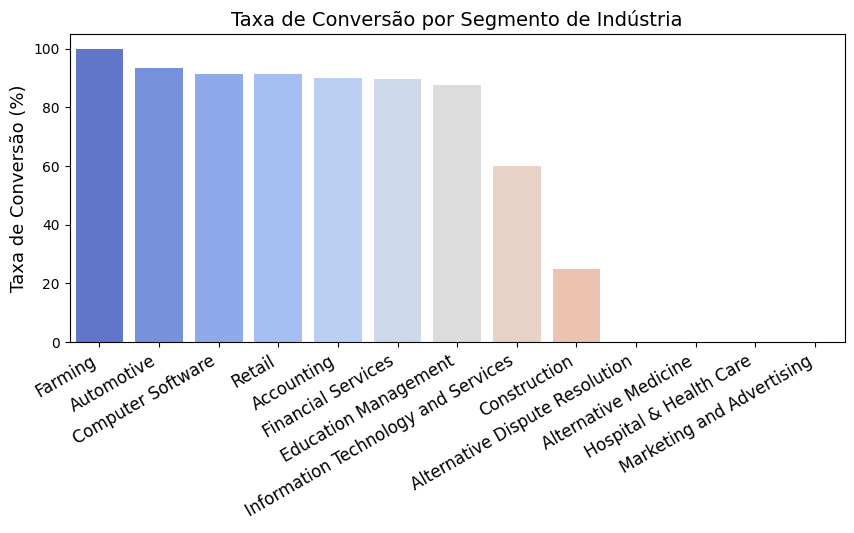

In [15]:
# Visualizando os melhores segmentos de indústria com um gráfico de barras
plt.figure(figsize=(10, 4))
sns.barplot(x=conversion_rate_by_segment.index, y=conversion_rate_by_segment.values, palette='coolwarm')
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.ylabel('Taxa de Conversão (%)', fontsize=13)
plt.title('Taxa de Conversão por Segmento de Indústria', fontsize=14)
plt.show()

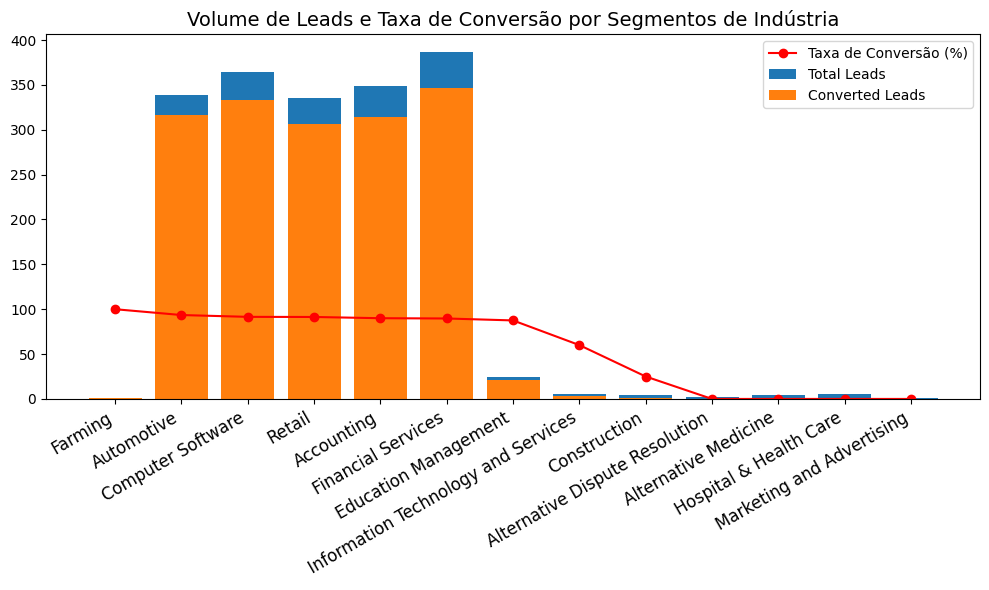

In [16]:
# Criando figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando barras empilhadas
ax.bar(conversion_analysis.index, conversion_analysis['Total Leads'], label='Total Leads')
ax.bar(conversion_analysis.index, conversion_analysis['Converted Leads'], label='Converted Leads')
ax.plot(conversion_analysis.index, conversion_analysis['Conversion Rate (%)'], color='red', marker='o', label='Taxa de Conversão (%)')

# Adicionando rótulos e legenda
ax.set_title('Volume de Leads e Taxa de Conversão por Segmentos de Indústria', fontsize=14)
ax.legend()

# Girando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=30, ha='right', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## Resposta:
### Segmentos de Indústria com Maior Potencial de se Tornarem Clientes

1. **Farming**: Embora tenha apenas 1 lead, todos eles se converteram em clientes, resultando em uma taxa de conversão  excepcional. Porém o baixo número de leads pode limitar o potencial de crescimento.

2. **Automotive**: Com 339 leads, 317 deles se converteram em clientes, resultando em uma alta taxa de conversão de aproximadamente 93.51%.

3. **Computer Software**: Com 364 leads, 333 deles se converteram em clientes, resultando em uma taxa de conversão de cerca de 91.48%.

4. **Retail**: Dos 335 leads, 306 se converteram em clientes, resultando em uma taxa de conversão de aproximadamente 91.34%.

5. **Accounting**: Com 349 leads, 314 deles se converteram em clientes, resultando em uma taxa de conversão de aproximadamente 89.97%.

**Enquanto esses segmentos de indústria destacam-se por suas altas taxas de conversão e números significativos de leads, é importante notar que outros segmentos podem ter potencial igualmente promissor. Segmentos como *Financial Services*, *Education Management* e *Information Technology and Services* também demonstram uma taxa de conversão acima da média, apesar de terem números menores de leads. É crucial considerar não apenas a taxa de conversão, mas também o volume de leads ao tomar decisões de investimento.**

## Representando um Gráfico com o Volume de Leads em Cada Etapa do Ciclo de Vida (Lifecycle)


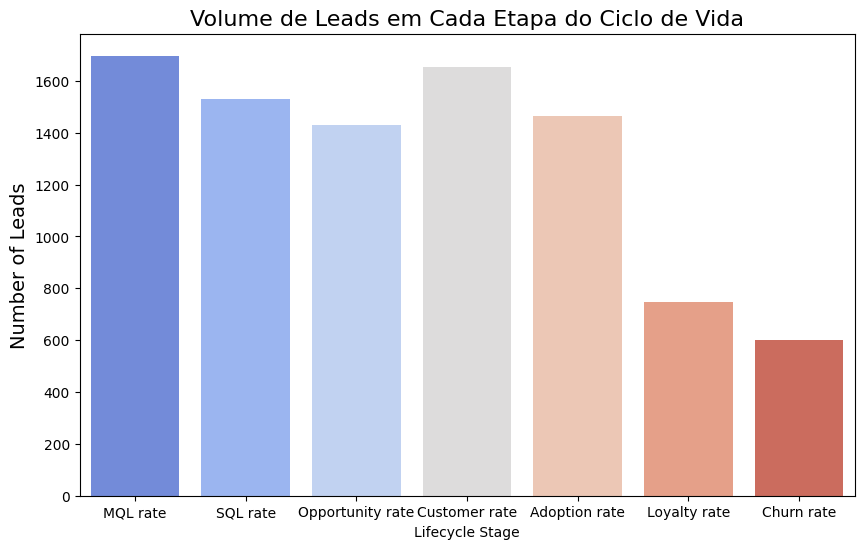

In [17]:
# Contando o número de leads em cada etapa do ciclo de vida
lifecycle_stages = ['MQL rate', 'SQL rate', 'Opportunity rate', 'Customer rate', 'Adoption rate', 'Loyalty rate', 'Churn rate']
lifecycle_counts = {}

for stage in lifecycle_stages:
    lifecycle_counts[stage] = data[stage].value_counts().get('Yes', 0)

# Convertendo os resultados para um DataFrame
lifecycle_df = pd.DataFrame(list(lifecycle_counts.items()), columns=['Lifecycle Stage', 'Count'])

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Lifecycle Stage', y='Count', data=lifecycle_df, palette='coolwarm')
plt.ylabel('Number of Leads', fontsize=14)
plt.title('Volume de Leads em Cada Etapa do Ciclo de Vida', fontsize=16)
plt.show()

# d) Criando Outras Análises que Possam Ser Úteis

## iv) Quais Equipes de Vendas Apresentam Melhor Desempenho?

In [18]:
# Agrupando os dados por equipe de vendas
sales_team_conversion = data.groupby('Sales Acquisition Team')['Customer rate'].value_counts().unstack(fill_value=0)

# Calculando o número total de leads por equipe de vendas
total_leads_by_team = sales_team_conversion.sum(axis=1)

# Calculando o número de leads convertidos em clientes por equipe de vendas
converted_leads_by_team = sales_team_conversion['Yes']

# Calculando a taxa de conversão para cada equipe de vendas
conversion_rate_by_team = (converted_leads_by_team / total_leads_by_team) * 100

# Criando um DataFrame com os resultados
conversion_by_team_df = pd.DataFrame({
    'Total Leads': total_leads_by_team,
    'Converted Leads': converted_leads_by_team,
    'Conversion Rate (%)': conversion_rate_by_team
})

# Ordenando o DataFrame pela taxa de conversão em ordem decrescente
conversion_by_team_df = conversion_by_team_df.sort_values(by='Conversion Rate (%)', ascending=False)

# Exibindo o DataFrame com os resultados
conversion_by_team_df

,Total Leads,Converted Leads,Conversion Rate (%)
Sales Acquisition Team,,,
3.1.2.2.1. Pre-Sales - SDR - ROW - Active,1,1,100.000000
4.1.1.1. Onboarding - Latam - Active,6,6,100.000000
4.2.1.1.1. Customer Success - High & Mid - Latam - Active,2,2,100.000000
NX.7.1. Nexforce - Solutions Architect,1,1,100.000000
3.1.2.1.1. Pre-Sales - SDR - Latam - Active,4,3,75.000000
3.2.3.1.1. Account Executive - Enterprise - Latam - Active,183,119,65.027322
3.2.2.1.1. Account Executive - SMB - Latam - Active,18,7,38.888889
1.1. Operations - Administrator,1,0,0.000000


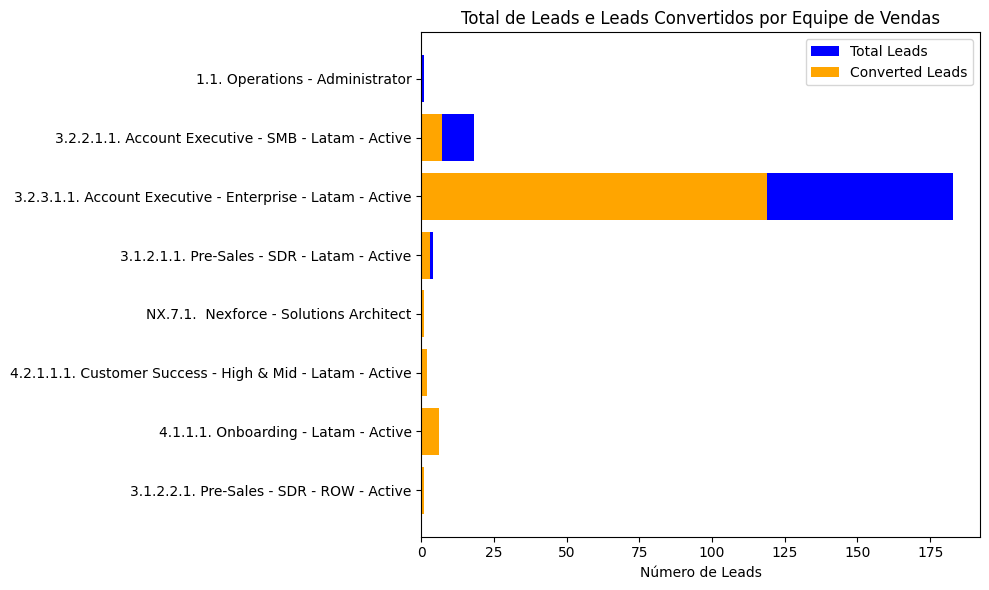

In [19]:
# Definindo os dados
teams = conversion_by_team_df.index
total_leads = conversion_by_team_df['Total Leads']
converted_leads = conversion_by_team_df['Converted Leads']

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o número total de leads
ax.barh(teams, total_leads, label='Total Leads', color='b')

# Plotando o número de leads convertidos
ax.barh(teams, converted_leads, label='Converted Leads', color='orange')

# Adicionando rótulos e título
ax.set_xlabel('Número de Leads')
ax.set_title('Total de Leads e Leads Convertidos por Equipe de Vendas')
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## Resposta:

### Ao analisar o desempenho das equipes de vendas ordenadas por volume de leads, observamos o seguinte:

1. **3.2.3.1.1. Account Executive - Enterprise - Latam - Active**: Com um volume considerável de leads (183 leads), essa equipe apresenta uma taxa de conversão de cerca de 65%, indicando um desempenho sólido.
2. **3.2.2.1.1. Account Executive - SMB - Latam - Active**: Apesar de ter um volume moderado de leads (18 leads), a taxa de conversão dessa equipe é significativamente menor, em torno de 38.88%.
3. **4.1.1.1. Onboarding - Latam - Active**: Mesmo com pouco volume deleads (6 leads), essa equipe converteu todos os leads em clientes, apresentando um desempenho perfeito.
4. **3.1.2.1.1. Pre-Sales - SDR - Latam - Active**: Apesar de ter pouco volume de leads (4 leads), essa equipe apresenta uma taxa de conversão ligeiramente menor, convertendo 75% dos leads em clientes.
5. **4.2.1.1.1. Customer Success - High & Mid - Latam - Active**: Com um volume de leads bem baixo (2 leads), essa equipe converteu todos os leads em clientes, apresentando um desempenho perfeito.
6. **3.1.2.2.1. Pre-Sales - SDR - ROW - Active**: Com um volume de leads mínimo (1 lead), essa equipe também converteu todos os em clientes.
7. **NX.7.1. Nexforce - Solutions Architect**: como a equipe anterior converteu seu único lead em cliente.
8. **1.1. Operations - Administrator**: Esta equipe não converteu nenhum dos leads em clientes (1 lead).

Vale ressaltar a importância de avaliar tanto o volume quanto a eficácia de conversão ao analisar o desempenho das equipes de vendas.

## v) Qual Tamanho de Empresa Apresenta Melhor Desempenho?

In [20]:
# Agrupando os dados por 'Number of employees (list)' e calculando o total de leads
total_leads_by_size = data['Number of employees (list)'].value_counts()

# Calculando o número de leads convertidos para cada faixa de tamanho de empresa
converted_leads_by_size = data[data['Customer rate'] == 'Yes']['Number of employees (list)'].value_counts()

# Calculando a taxa de conversão para cada faixa de tamanho de empresa
conversion_rate_by_size = (converted_leads_by_size / total_leads_by_size) * 100
conversion_rate_by_size = conversion_rate_by_size.sort_values(ascending=False)

# Criando um DataFrame com os resultados
conversion_analysis_size = pd.DataFrame({
    'Total Leads': total_leads_by_size,
    'Converted Leads': converted_leads_by_size,
    'Conversion Rate (%)': conversion_rate_by_size
}).fillna(0).sort_values(by='Total Leads', ascending=False)

conversion_analysis_size

,Total Leads,Converted Leads,Conversion Rate (%)
51-200 employees,490,441.0,90.000000
201-500 employees,480,431.0,89.791667
11-50 employees,438,396.0,90.410959
1-10 employees,411,376.0,91.484185
1001-5000 employees,15,5.0,33.333333
501-1000 employees,8,2.0,25.000000
"5001-10,000 employees",1,0.0,0.000000


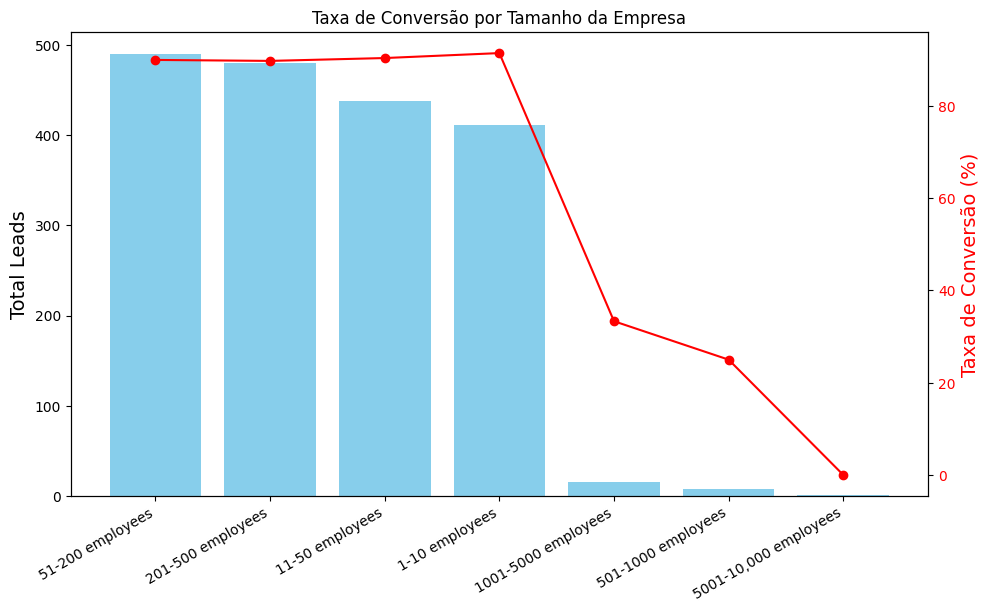

In [21]:
# Visualização
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para o total de leads
ax1.bar(conversion_analysis_size.index, conversion_analysis_size['Total Leads'], color='skyblue', label='Total Leads')
ax1.set_ylabel('Total Leads', fontsize=14)
ax1.tick_params(axis='y')
ax1.set_xticks(range(len(conversion_analysis_size.index)))
ax1.set_xticklabels(conversion_analysis_size.index, rotation=30, ha='right', )

# Adicionando uma segunda escala y para a taxa de conversão
ax2 = ax1.twinx()
ax2.plot(range(len(conversion_analysis_size.index)), conversion_analysis_size['Conversion Rate (%)'], color='red', marker='o', label='Conversion Rate (%)')
ax2.set_ylabel('Taxa de Conversão (%)', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Taxa de Conversão por Tamanho da Empresa')
plt.show()

## Resposta:
**Pequenas e Médias Empresas:**
As pequenas empresas (1-10 funcionários) têm a taxa de conversão mais alta (91.48%), seguidas por empresas de 11-50 funcionários (90.41%).
As médias empresas (51-200 e 201-500 funcionários) também mostram uma alta taxa de conversão, em torno de 90%.

**Grandes Empresas:**
As taxas de conversão caem drasticamente para empresas maiores.
Empresas com 1001-5000 funcionários têm uma taxa de conversão de 33.33%, e aquelas com 501-1000 funcionários têm 25%.
Empresas com 5001-10,000 funcionários não converteram nenhum lead.


**Essa análise sugere que focar em pequenas e médias empresas pode ser mais eficaz, enquanto estratégias adicionais podem ser necessárias para melhorar a conversão em grandes empresas.**

## vi) Quanto Tempo em Média o Lead Leva para se Tornar Cliente em Cada Etapa do Funil?

In [22]:
# Filtrando apenas os leads que se tornaram clientes
customer_data = data[data['Customer rate'] == 'Yes'].copy()

# Convertendo a coluna de tempo de conversão para timedelta
customer_data.loc[:, 'Time from Lead to Customer (HH:mm:ss)'] = pd.to_timedelta(customer_data['Time from Lead to Customer (HH:mm:ss)'], errors='coerce')

# Calculando o tempo médio de conversão
mean_conversion_time = customer_data['Time from Lead to Customer (HH:mm:ss)'].mean().round('s')

# Verificando o tempo médio em cada etapa do funil
funnel_stages = ['Lead', 'MQL', 'SQL', 'Opportunity', 'Customer']
funnel_times = {}

for stage in funnel_stages:
    stage_col = f'Time from {stage} to Customer (HH:mm:ss)'
    if stage_col in customer_data.columns:
        customer_data.loc[:, stage_col] = pd.to_timedelta(customer_data[stage_col], errors='coerce')
        funnel_times[stage] = customer_data[stage_col].mean().round('s')

for stage, time in funnel_times.items():
    print(f"Tempo médio de {stage} para Customer: {time}")


Tempo médio de Lead para Customer: 111 days 15:10:56
Tempo médio de MQL para Customer: 106 days 04:25:02
Tempo médio de SQL para Customer: 85 days 02:51:53
Tempo médio de Opportunity para Customer: 53 days 02:33:56


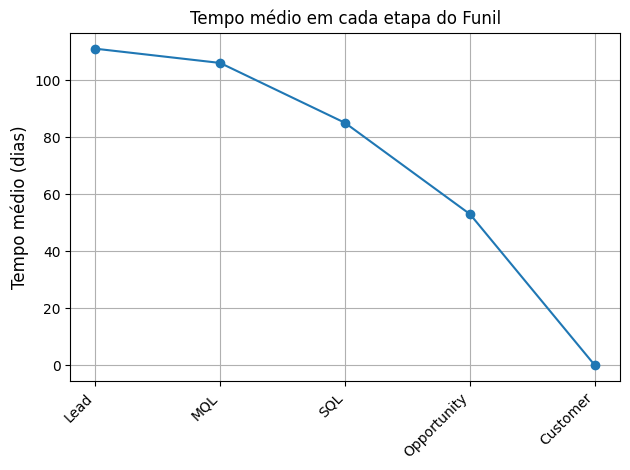

In [23]:
# Dados para o gráfico
x_values = ['Lead', 'MQL', 'SQL', 'Opportunity', 'Customer']
y_values = [111, 106, 85, 53, 0]  # Substitua pelos seus próprios valores

# Criando o gráfico de linha
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Adicionando rótulos e título
plt.ylabel('Tempo médio (dias)', fontsize=12)
plt.title('Tempo médio em cada etapa do Funil')

# Rotacionando os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

## Resposta:
### O tempo médio de conversão de leads para clientes é de aproximadamente 111 dias, 15 horas, 10 minutos e 56 segundos.

**Tempo Médio em Cada Etapa do Funil**
**Lead para MQL:** 106 dias, 4 horas, 25 minutos e 1 segundo<br>
**MQL para SQL:** 85 dias, 2 horas, 51 minutos e 53 segundos<br>
**SQL para Oportunidade:** 53 dias, 2 horas, 33 minutos e 56 segundos<br>
**Oportunidade para Cliente:** 53 dias, 2 horas, 33 minutos e 56 segundos<br>

**Observações**
**A maior parte do tempo é gasta na etapa de Lead para MQL, indicando uma possível necessidade de otimização nessa fase do funil.
Reduzir o tempo nas etapas iniciais do funil pode acelerar o processo de conversão e melhorar a eficiência geral do processo de vendas.**


## vii) **Quais os 3 Melhores Clientes**?

In [24]:
# Convertendo a coluna 'Time from Lead to Customer (HH:mm:ss)' para timedelta
data['Time from Lead to Customer (HH:mm:ss)'] = pd.to_timedelta(data['Time from Lead to Customer (HH:mm:ss)'])

# Normalizando os dados para combinar as métricas
data['Lead Score Normalized'] = data['Lead Score'] / data['Lead Score'].max()
data['Time from Lead to Customer Normalized'] = 1 - (data['Time from Lead to Customer (HH:mm:ss)'] / data['Time from Lead to Customer (HH:mm:ss)'].max())

# Adicionando um fator de lealdade (se 'Loyalty rate' == Yes, então 1, senão 0)
data['Loyalty Factor'] = data['Loyalty rate'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculando uma métrica combinada considerando lealdade
data['Combined Score with Loyalty'] = data['Lead Score Normalized'] + data['Time from Lead to Customer Normalized'] + data['Loyalty Factor']

# Selecionando os 3 melhores leads
top_3_leads = data.nlargest(3, 'Combined Score with Loyalty')[['Lead name', 'Lead Score', 'Time from Lead to Customer (HH:mm:ss)', 'Loyalty rate', 'Combined Score with Loyalty']]

# Criando um DataFrame para melhor visualização
df_top_3_leads = pd.DataFrame(top_3_leads)

# Exibindo os 3 melhores leads e as razões para serem considerados os melhores
print("Os 3 Melhores Leads:")
print("-" * 40)
for index, row in top_3_leads.iterrows():
    print()
    print(f"Lead Name: {row['Lead name']}")
    print(f"Lead Score: {row['Lead Score']}")
    print(f"Time from Lead to Customer: {row['Time from Lead to Customer (HH:mm:ss)']}")
    print(f"Loyalty rate: {row['Loyalty rate']}")
    print(f"Combined Score with Loyalty: {row['Combined Score with Loyalty']}")
    print()
    print("-" * 40)

Os 3 Melhores Leads:
----------------------------------------

Lead Name: Fernando Macedo- TeleSign - New Lead
Lead Score: 10.0
Time from Lead to Customer: 0 days 14:37:08
Loyalty rate: Yes
Combined Score with Loyalty: 2.998484028403295

----------------------------------------

Lead Name: TeleSign - New Lead
Lead Score: 10.0
Time from Lead to Customer: 0 days 15:24:49
Loyalty rate: Yes
Combined Score with Loyalty: 2.9984016160992333

----------------------------------------

Lead Name: Xertica - First Lead
Lead Score: 10.0
Time from Lead to Customer: 0 days 19:14:50
Loyalty rate: Yes
Combined Score with Loyalty: 2.9980040725101533

----------------------------------------


In [25]:
df_top_3_leads

,Lead name,Lead Score,Time from Lead to Customer (HH:mm:ss),Loyalty rate,Combined Score with Loyalty
113,Fernando Macedo- TeleSign - New Lead,10.0,0 days 14:37:08,Yes,2.998484
111,TeleSign - New Lead,10.0,0 days 15:24:49,Yes,2.998402
184,Xertica - First Lead,10.0,0 days 19:14:50,Yes,2.998004


###  Os 3 melhores clientes foram determinados com base na pontuação de lead, tempo de conversão para cliente e taxa de lealdade:

#### 1. Fernando Macedo - TeleSign - New Lead
- **Lead Score:** 10.0
- **Tempo para se tornar cliente:** 14 horas, 37 minutos e 8 segundos
- **Taxa de Lealdade:** Sim
- **Pontuação Combinada com Lealdade:** 2.998484028403295

#### 2. TeleSign - New Lead
- **Lead Score:** 10.0
- **Tempo para se tornar cliente:** 15 horas, 24 minutos e 49 segundos
- **Taxa de Lealdade:** Sim
- **Pontuação Combinada com Lealdade:** 2.9984016160992333

#### 3. Xertica - First Lead
- **Lead Score:** 10.0
- **Tempo para se tornar cliente:** 19 horas, 14 minutos e 50 segundos
- **Taxa de Lealdade:** Sim
- **Pontuação Combinada com Lealdade:** 2.9980040725101533

Esses clientes destacam-se por sua alta pontuação de lead, rápido tempo de conversão e alta lealdade, tornando-os extremamente valiosos para a empresa.


## vii) **Qual a Importância da Modelagem de Churn na Retenção de Clientes**?

In [26]:
# Selecionando as colunas relevantes
relevant_columns = [
    'Recent Lifecycle Stage',
    'Work rate',
    'Latest lead stage',
    'Unqualified rate',
    'Opportunity rate',
    'Customer rate',
    'Lead Status',
    'Lead type',
    'SQL rate',
    'Leads pipeline',
    'Leads pipeline stage',
    'Loyalty rate',
    'Connect rate',
    'Number of associated contacts',
    'Number of associated companies',
    'Lead Score',
    'Time from Lead to SQL (HH:mm:ss)'
]

# Criando uma cópia do DataFrame apenas com as colunas relevantes
data_filtered = data[relevant_columns].copy()

# Calculando a média para a coluna com valores nulos
mean_lead_score = data_filtered['Lead Score'].mean()

# Substituindo os valores nulos pela média
data_filtered['Lead Score'].fillna(mean_lead_score, inplace=True)

# Convertendo as colunas de tipo object para tipo categórico
for column in data_filtered.select_dtypes(include=['object']).columns:
    data_filtered[column] = data_filtered[column].astype('category')

# Convertendo colunas categóricas em numéricas
label_encoder = LabelEncoder()
for column in data_filtered.select_dtypes(include=['category']).columns:
    data_filtered[column] = label_encoder.fit_transform(data_filtered[column])

# Dividindo os dados em conjunto de treinamento e teste
X = data_filtered.drop('Customer rate', axis=1)
y = data_filtered['Customer rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Prevendo os resultados
y_pred = model.predict(X_test)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisão do modelo: {accuracy:.2f}')

Precisão do modelo: 0.99


In [27]:
# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       1.00      1.00      1.00       335

    accuracy                           0.99       379
   macro avg       0.99      0.99      0.99       379
weighted avg       0.99      0.99      0.99       379



## Resposta
**A modelagem de churn é fundamental para a retenção de clientes, pois permite que as empresas identifiquem antecipadamente quais clientes estão propensos a deixar seus serviços ou produtos. Isso não apenas ajuda a manter os clientes existentes, mas também pode economizar custos associados à aquisição de novos clientes.**

### Alerta de Churn

Também podemos criar um sistema de alerta para detectar potenciais clientes em risco de churn. Isso pode ser feito utilizando nosso modelo de churn (mas que deve ser aprimorado com outras colunas mais relevantes). Eis um exemplo de como isso poderia ser feito:

1. Definindo um limiar de probabilidade de churn. Por exemplo, podemos considerar que clientes com uma probabilidade de churn superior a 70% estão em risco.

2. Executando o modelo de churn nos dados dos clientes regularmente para prever a probabilidade de churn para cada cliente.

3. Comparando a probabilidade de churn de cada cliente com o limiar definido. Se a probabilidade for superior ao limiar, o cliente é considerado em risco de churn.

4. Criando um sistema de alerta para notificar a equipe responsável sempre que um cliente for identificado como em risco de churn. Isso pode ser feito por e-mail, mensagem de texto ou outro meio de comunicação adequado.

5. A equipe pode então tomar medidas proativas para reter esses clientes, como entrar em contato com eles para resolver quaisquer problemas ou oferecer incentivos especiais.